In [33]:
from collections import defaultdict
import json
import gzip
import pandas as pd

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

Sayeh = True

In [34]:
if Sayeh: file_path = '/Users/sayehbayat/Documents/GIT/endomondo_analysis/data/processed_endomondoHR_proper_interpolate.json'

In [35]:
# Since the dataset downloaded is in json format, apply the following function to open the file, then transform it into a csv file. 
reviews = []
with open(file_path, 'r') as train_file:
    for l in train_file:
        reviews.append(json.loads(l.strip()))

In [36]:
df = pd.DataFrame.from_dict(reviews)

In [4]:
df.head()

,altitude,derived_speed,distance,gender,heart_rate,id,latitude,longitude,since_begin,since_last,sport,tar_derived_speed,tar_heart_rate,time_elapsed,timestamp,userId
0,"[-1.8044666444624415, -1.8186355216814518, -1....","[-7.082944439006438, -2.0887804946280517, -0.3...","[-4.372303649217691, -1.7973204455488407, -0.0...",male,"[-8.19736903680111, -5.369011795827567, -3.916...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[1378478.8892184314, 1378478.8892184314, 13784...","[2158.84607810351, 2158.84607810351, 2158.8460...",bike,"[7.105427357601002e-15, 12.55488778108872, 16....","[100.00000000000001, 113.3554687995226, 120.21...","[-0.12256752559145224, -0.12212174572209424, -...","[1408898746, 1408898754, 1408898765, 140889877...",10921915
1,"[-1.8511185199732794, -1.840745601807835, -1.8...","[-7.082944439006439, -1.2589570272723163, -0.5...","[-4.37230364921769, -1.6800989663278172, -0.13...",male,"[-8.197369036801112, -6.420460330128671, -5.77...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",bike,"[3.552713678800501e-15, 14.640990805898799, 16...","[100.0, 108.39054149446667, 111.43436132247462...","[-0.12256752559145224, -0.12212174572209424, -...","[1408221682, 1408221687, 1408221699, 140822170...",10921915
2,"[-1.2971274982820802, -1.3521569575102117, -1....","[-7.082944439006441, -2.987691226928259, -0.42...","[-4.372303649217692, -2.1788504851189674, 0.24...",male,"[-8.409144249145188, -6.563512353305338, -5.42...",389643739,"[60.17326201312244, 60.173205351457, 60.172969...","[24.64995657093823, 24.650197718292475, 24.651...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",bike,"[0.0, 10.2951054641808, 16.72500473030047, 18....","[99.0, 107.71505156534198, 113.11223288000906,...","[-0.12256752559145224, -0.12212174572209424, -...","[1407858459, 1407858466, 1407858478, 140785849...",10921915
3,"[-1.9939898887252205, -1.9829213611093435, -1....","[-7.082944439006442, -0.8229240287011282, 0.17...","[-4.3723036492176925, -2.061209510309335, 0.36...",male,"[-8.409144249145186, -6.001589489909068, -6.14...",386729739,"[60.173286236822605, 60.17323946580291, 60.173...","[24.649874344468117, 24.650242729112506, 24.65...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",bike,"[-3.552713678800501e-15, 15.73713931581606, 18...","[99.0, 110.36844455301284, 109.69717734531372,...","[-0.12256752559145224, -0.12212174572209424, -...","[1407432042, 1407432048, 1407432056, 140743206...",10921915
4,"[-2.2330807507182637, -2.224789833131245, -2.2...","[-7.082944439006439, -4.38098917368015, -2.962...","[-4.372303649217691, -0.6048763517653996, 1.00...",male,"[-8.197369036801112, -6.568225743116737, -6.41...",372368431,"[60.17331792041659, 60.17307207919657, 60.1723...","[24.64967619627714, 24.650766011327505, 24.650...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",bike,"[3.552713678800501e-15, 6.792477284186484, 10....","[100.0, 107.69279499546666, 108.41908350134233...","[-0.12256752559145224, -0.12212174572209424, -...","[1405281638, 1405281660, 1405281679, 140528169...",10921915


In [38]:
if Sayeh: file_path = '/Users/sayehbayat/Documents/GIT/endomondo_analysis/data/endomondoMeta.json'

In [42]:
reviews = []
with open(file_path, 'r') as train_file:
    for l in train_file:
        reviews.append(json.loads(json.dumps(l).strip()))

In [43]:
meta_df = pd.DataFrame.from_dict(reviews)

In [53]:
meta_df[0][3]

"{'userId': 10014612, 'hydration': None, 'sport': 'mountain bike', 'ascent': 263.0, 'descent': 274.0, 'calories': 2732.0, 'duration': 7218.46, 'id': 322483865, 'timestamp': ['2014-03-30T14:01:32.000Z', '2014-03-30T14:01:48.000Z', '2014-03-30T14:02:03.000Z', '2014-03-30T14:02:14.000Z', '2014-03-30T14:02:27.000Z', '2014-03-30T14:02:39.000Z', '2014-03-30T14:02:51.000Z', '2014-03-30T14:03:02.000Z', '2014-03-30T14:03:15.000Z', '2014-03-30T14:03:27.000Z', '2014-03-30T14:03:35.000Z', '2014-03-30T14:03:47.000Z', '2014-03-30T14:04:01.000Z', '2014-03-30T14:04:17.000Z', '2014-03-30T14:04:31.000Z', '2014-03-30T14:04:42.000Z', '2014-03-30T14:04:52.000Z', '2014-03-30T14:05:04.000Z', '2014-03-30T14:05:19.000Z', '2014-03-30T14:05:31.000Z', '2014-03-30T14:05:46.000Z', '2014-03-30T14:05:57.000Z', '2014-03-30T14:06:06.000Z', '2014-03-30T14:06:17.000Z', '2014-03-30T14:06:31.000Z', '2014-03-30T14:06:41.000Z', '2014-03-30T14:06:51.000Z', '2014-03-30T14:07:02.000Z', '2014-03-30T14:07:14.000Z', '2014-03-30T14

In [54]:
if Sayeh: file_path = '/Users/sayehbayat/Documents/GIT/endomondo_analysis/data/endomondoHR.json'

In [60]:
reviews = []
with open(file_path, 'r') as train_file:
    for l in train_file:
        reviews.append(json.loads(json.dumps(l).strip()))

In [61]:
df_meta2 = pd.DataFrame.from_dict(reviews)

In [64]:
df_meta2[0][1]

"{'speed': [9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30.1716, 34.8372, 42.8436, 41.7852, 39.6612, 29.3616, 25.6932, 29.25, 26.6832, 29.1384, 24.8544, 28.062, 26.316, 26.046, 27.0756, 25.704, 25.794, 24.7032, 25.794, 26.1468, 24.4116, 25.0524, 24.6492, 27.7956, 29.4048, 30.222, 30.9096, 30.2508, 30.4956, 34.812, 33.1452, 30.2076, 31.9176, 32.3928, 33.984, 33.2424, 32.9544, 31.3272, 29.376, 27.3708, 26.8848, 25.1928, 24.3864, 23.7024, 23.3208, 11.2608, 22.8204, 27.288, 37.1304, 35.4996, 28.2168, 25.668, 20.0448, 21.2688, 22.1292, 29.2248, 28.4004, 31.8168, 33.4836, 28.2924, 29.2644, 29.1564, 31.9644, 33.354, 39.1392, 42.1488, 39.3228, 31.6836, 28.44, 28.44, 26.9424, 27.2304, 23.1984, 26.7552, 18.8208, 18.3276, 17.8164, 17.2548, 15.39, 15.93, 16.4772, 18.2844, 20.3688, 17.1792, 22.8528, 27.4248, 22.6512, 22.9896, 26.6616, 23.13, 23.4828, 23.13, 21.6288, 22.7196, 22.1724, 23.1732, 31.2732, 32.4612, 29.4768, 34.6572, 36.81, 34.812, 29.4768, 34.6572, 28.9224, 26.2584, 27.8748, 26.0784, 26.

In [72]:
len(df['distance'][850])

300

In [73]:
df['length']=df['distance'].apply(len)
df['length'].unique()

array([300])

In [74]:
df['lengthSpeed']=df['derived_speed'].apply(len)
df['lengthSpeed'].unique()

array([300])

In [76]:
df['time_elapsed'][0]

[-0.12256752559145224,
 -0.12212174572209424,
 -0.12167596585273623,
 -0.12123018598337823,
 -0.12078440611402022,
 -0.12033862624466223,
 -0.11989284637530422,
 -0.1194470665059462,
 -0.11900128663658821,
 -0.1185555067672302,
 -0.11810972689787222,
 -0.11766394702851421,
 -0.11721816715915621,
 -0.1167723872897982,
 -0.1163266074204402,
 -0.1158808275510822,
 -0.11543504768172419,
 -0.11498926781236621,
 -0.1145434879430082,
 -0.11409770807365019,
 -0.1136519282042922,
 -0.11320614833493418,
 -0.11276036846557619,
 -0.11231458859621818,
 -0.11186880872686018,
 -0.11142302885750217,
 -0.11097724898814416,
 -0.11053146911878617,
 -0.11008568924942816,
 -0.10963990938007018,
 -0.10919412951071217,
 -0.10874834964135416,
 -0.10830256977199616,
 -0.10785678990263815,
 -0.10741101003328016,
 -0.10696523016392215,
 -0.10651945029456417,
 -0.10607367042520616,
 -0.10562789055584815,
 -0.10518211068649015,
 -0.10473633081713214,
 -0.10429055094777415,
 -0.10384477107841614,
 -0.10339899120905

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

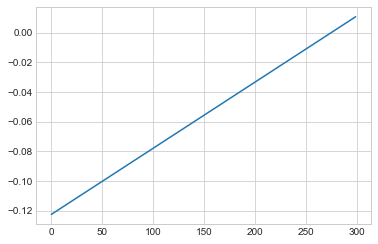

In [81]:
plt.plot(df['time_elapsed'][0])

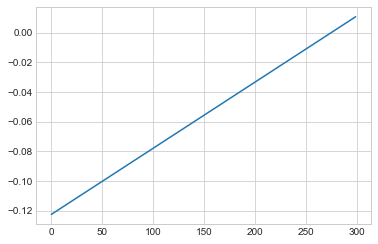

In [82]:
plt.plot(df['time_elapsed'][1])

In [88]:
a = df['time_elapsed'][1]
np.array(a[1:]) - np.array(a[0:-1])

array([0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044578,
       0.00044578, 0.00044578, 0.00044578, 0.00044578, 0.00044

In [87]:
len(a[0:-1])

299

In [89]:
df['userId'].min()

69

In [90]:
df['userId'].max()

15481421